# Implementing the Gradient Descent Algorithm_with a Kaggle dataset

Here we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [233]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(2.2,4.25)
    plt.ylim(0.4,1.7)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

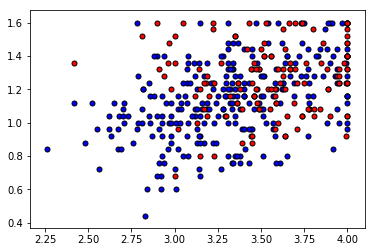

In [234]:
data = pd.read_csv('binary1.csv')
#data = data.drop(['rank'],axis = 1)
data['gre'] = data['gre'].div(500)
#print(data.head(5))
X = np.array(data[['gpa','gre','rank']])
y = np.array(data['admit'])
plot_points(X,y)
plt.show()

Implementing the basic functions

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [235]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(x, weights, bias):
    return sigmoid(np.dot(x, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias
    

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [250]:
np.random.seed(44)

epochs = 1500
learnrate = 0.0015

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=5 / n_features**.5, size=n_features)
    #print("we1 :",weights)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            #print(x,y)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
            #print(weights)
          
        #print ("we2 :", weights) 
        
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            
            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5
            
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 10) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  1.7782133179698283
Accuracy:  0.38

========== Epoch 150 ==========
Train loss:  0.5761960125181259
Accuracy:  0.7075

========== Epoch 300 ==========
Train loss:  0.5605467795448693
Accuracy:  0.73

========== Epoch 450 ==========
Train loss:  0.5539902847812229
Accuracy:  0.7225

========== Epoch 600 ==========
Train loss:  0.5505775226052368
Accuracy:  0.725

========== Epoch 750 ==========
Train loss:  0.5484544173366522
Accuracy:  0.7225

========== Epoch 900 ==========
Train loss:  0.5470052505494114
Accuracy:  0.7225

========== Epoch 1050 ==========
Train loss:  0.5459760310211995
Accuracy:  0.7225

========== Epoch 1200 ==========
Train loss:  0.5452326830386489
Accuracy:  0.7225

========== Epoch 1350 ==========
Train loss:  0.5446915073136894
Accuracy:  0.725


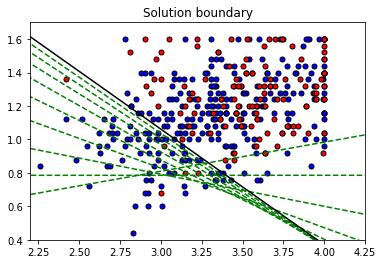

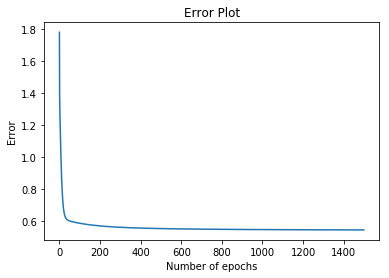

In [251]:
train(X, y, epochs, learnrate, True)